## Name: Harsh Chaudhari


## Implement the Image classification CNN modelfor classifying hand-written MNISTdataset by dividing the model into following 4 stages:
    a. Loading and preprocessing the image data
    b. Defining the model's architecture
    c. Training the model
    d. Estimating the model's performance 

In [1]:
import tensorflow.keras as keras

In [2]:
from tensorflow.keras.losses import SparseCategoricalCrossentropy
# from tensorflow.keras.datasets import mnist
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.layers import Conv2D,MaxPool2D,Flatten,Dense
from tensorflow.keras.models import Sequential

In [3]:
# (X_train,y_train),(X_test,y_test) = mnist.load_data()
import pandas as pd
train_data = pd.read_csv("mnist_train.csv")
test_data = pd.read_csv("mnist_test.csv")

In [4]:
X_train = train_data.drop('label', axis=1).values
y_train = train_data['label'].values

X_test = test_data.drop('label', axis=1).values
y_test = test_data['label'].values

In [5]:
X_train = X_train.reshape(-1,28,28,1)
X_test = X_test.reshape(-1,28,28,1)

In [6]:
X_train = X_train / 255.0
X_test = X_test / 255.0

In [7]:
model = Sequential ([
    Conv2D(128,(3,3), activation='relu', input_shape=(28,28,1)),
    MaxPool2D((2,2)),
    Conv2D(64,(3,3), activation='relu'),
    MaxPool2D((2,2)),
    Conv2D(32,(3,3), activation='relu'),
    MaxPool2D((2,2)),
    Flatten(),
    Dense(32, activation='relu'),
    Dense(10, activation='softmax'),
    
])
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 128)       1280      
                                                                 
 max_pooling2d (MaxPooling2D  (None, 13, 13, 128)      0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 11, 11, 64)        73792     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 5, 5, 64)         0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 3, 3, 32)          18464     
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 1, 1, 32)         0

In [8]:
model.compile(optimizer='Adam',metrics=['accuracy'], loss=SparseCategoricalCrossentropy())

In [9]:
epochs = 2
H  = model.fit(X_train,y_train,validation_data=(X_test,y_test),epochs=epochs)

Epoch 1/2
1875/1875 [==============================] - 55s 29ms/step - loss: 0.2547 - accuracy: 0.9204 - val_loss: 0.0915 - val_accuracy: 0.9735
Epoch 2/2
1875/1875 [==============================] - 56s 30ms/step - loss: 0.0839 - accuracy: 0.9750 - val_loss: 0.0784 - val_accuracy: 0.9766


In [10]:
from sklearn.metrics import classification_report
prediction = model.predict(X_test)
print(classification_report(y_test, prediction.argmax(axis=1)))

313/313 [==============================] - 2s 7ms/step
              precision    recall  f1-score   support

           0       0.97      1.00      0.98       980
           1       0.99      0.99      0.99      1135
           2       0.99      0.95      0.97      1032
           3       0.93      0.99      0.96      1010
           4       0.98      0.98      0.98       982
           5       0.96      0.99      0.97       892
           6       0.99      0.97      0.98       958
           7       0.98      0.96      0.97      1028
           8       0.99      0.97      0.98       974
           9       0.98      0.97      0.97      1009

    accuracy                           0.98     10000
   macro avg       0.98      0.98      0.98     10000
weighted avg       0.98      0.98      0.98     10000



In [11]:
import matplotlib.pyplot as plt

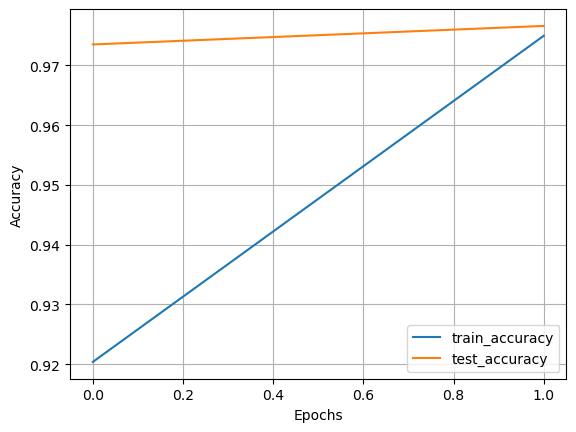

In [12]:
import matplotlib.pyplot as plt
plt.plot(range(0,epochs),H.history['accuracy'],label = 'train_accuracy')
plt.plot(range(0,epochs),H.history['val_accuracy'],label = 'test_accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.grid()

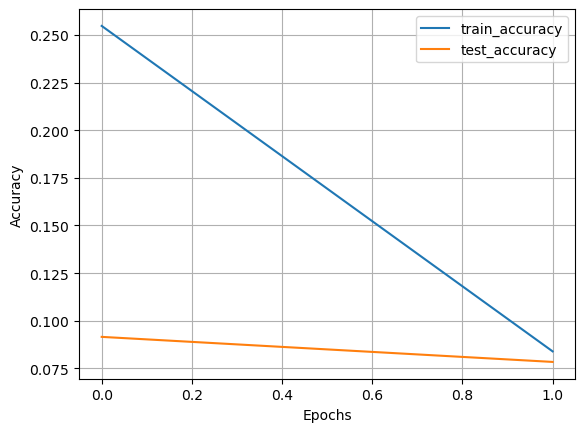

In [13]:
import matplotlib.pyplot as plt
plt.plot(range(0,epochs),H.history['loss'],label = 'train_accuracy')
plt.plot(range(0,epochs),H.history['val_loss'],label = 'test_accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.grid()

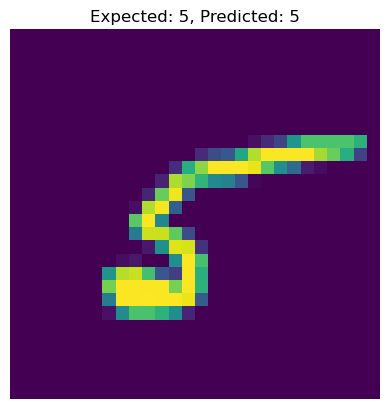

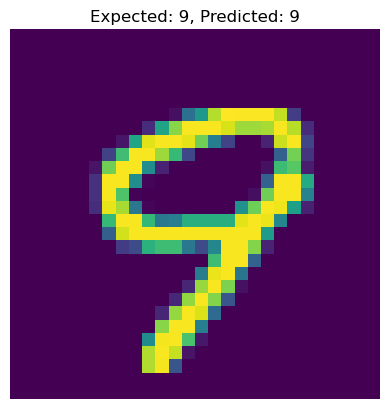

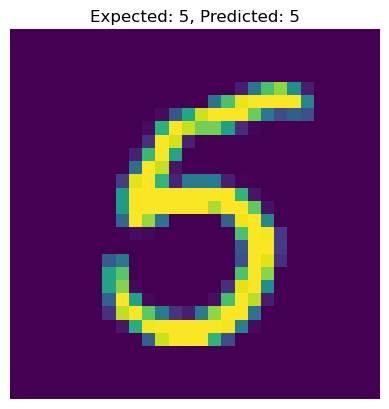

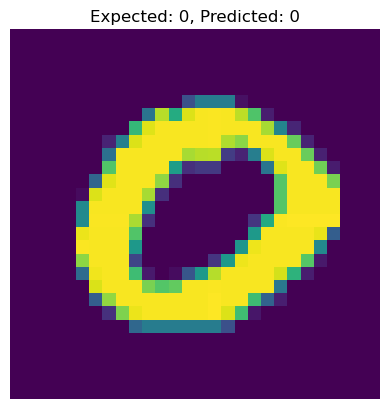

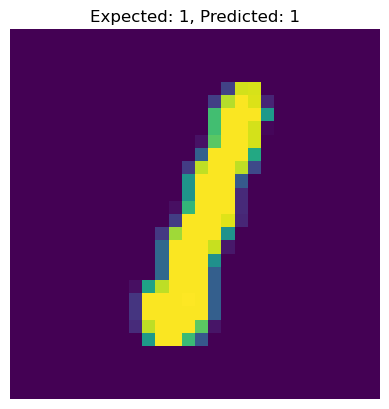

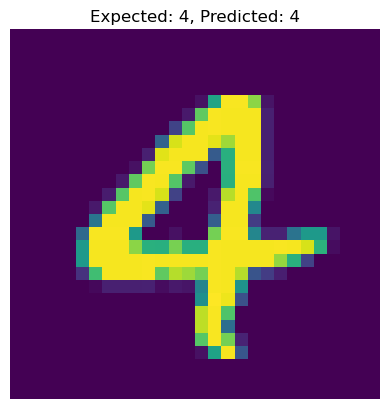

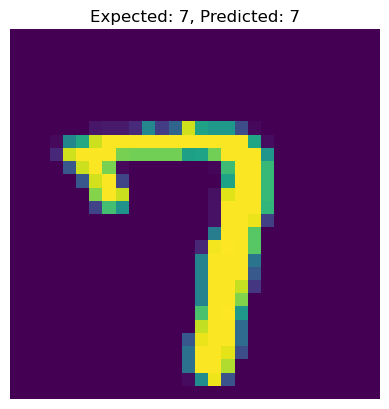

In [15]:
import numpy as np
n = 7
indices = np.random.choice(len(X_test), n)
for i, idx in enumerate(indices):
    expected_label = y_test[idx]
    predicted_label = np.argmax(prediction[idx])

    # Display the image with labels
    plt.imshow(X_test[idx].reshape(28,28))
    plt.title(f'Expected: {expected_label}, Predicted: {predicted_label}')
    plt.axis('off')
    plt.show()